In [14]:
#bibliotecas de análise
import pandas as pd
import numpy as np

#pacotes para gráficos
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns

#pacote para clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

#pacote para realização do PCA
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

#pacote para arvore de decião
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

#pacotes para o randon florest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz

Carregando a tabela de dados préprocessada

In [3]:
df = pd.read_csv('../Scripts/df_metal_ML.csv', sep = ',', header = 0, na_values = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Material   675 non-null    object 
 1   Su         675 non-null    int64  
 2   Sy         675 non-null    int64  
 3   A5         675 non-null    float64
 4   Bhn        675 non-null    float64
 5   E          675 non-null    int64  
 6   G          675 non-null    int64  
 7   mu         675 non-null    float64
 8   Ro         675 non-null    int64  
 9   categoria  498 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 52.9+ KB


In [6]:
df.describe(include = 'all')

,Material,Su,Sy,A5,Bhn,E,G,mu,Ro,categoria
count,675,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,675.000000,498.000000
unique,630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,GOST Steel 50 GOST 1577-93 normalized,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,584.880000,409.570370,14.061333,101.502222,150456.296296,108336.296296,0.310726,5703.684444,3.777108
std,NaN,389.751772,339.980396,11.094605,124.457343,65143.432944,186578.885476,0.016529,2610.918867,0.748250
min,NaN,69.000000,28.000000,0.000000,0.000000,73000.000000,26000.000000,0.290000,1750.000000,2.000000
25%,NaN,276.000000,200.000000,6.000000,0.000000,73000.000000,26000.000000,0.300000,2700.000000,3.000000
50%,NaN,524.000000,320.000000,12.000000,60.000000,200000.000000,77000.000000,0.300000,7820.000000,4.000000
75%,NaN,733.000000,466.500000,20.000000,176.500000,207000.000000,80000.000000,0.330000,7860.000000,4.000000


In [7]:
var = df.drop(['Material', 'categoria'], axis = 1)
df_resposta = df['categoria'].values

In [49]:
#padronização dos dados
scaler = StandardScaler()
features = scaler.fit(var)
features = features.transform(var)

Cuslteriração por kmeans

In [55]:
df_scaled = pd.DataFrame(features, columns = var.columns)
df_scaled.head(5)

,Su,Sy,A5,Bhn,E,G,mu,Ro
0,-0.420785,-0.281314,2.249486,0.196983,0.868631,-0.157349,-0.649393,0.826496
1,-0.413082,-0.251879,2.069085,0.156779,0.868631,-0.157349,-0.649393,0.826496
2,-0.510652,-0.369620,2.069085,0.076370,0.868631,-0.157349,-0.649393,0.826496
3,-0.351458,-0.231274,1.978884,0.333677,0.868631,-0.157349,-0.649393,0.826496
4,-0.369432,-0.187121,1.960844,0.237187,0.868631,-0.157349,-0.649393,0.826496


In [56]:
X = df_scaled.values

Determinando o número de clusters

In [57]:
wcs = {}

for i in range (1, 8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcs[i] = kmeans.inertia_

/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Volumes/Dados_1/Aplicativos/anaconda3/envs/tcc_dsa/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

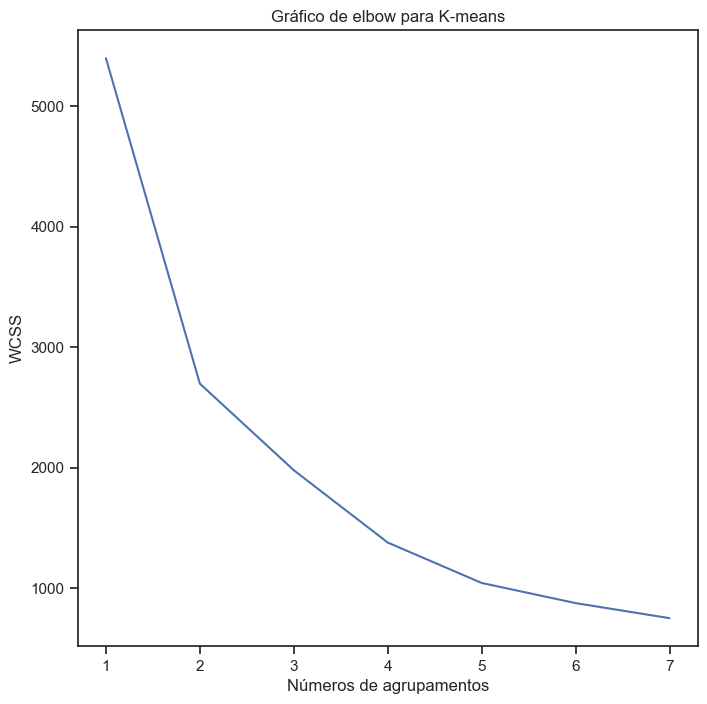

In [66]:
#Gráfico de elbow
sns.set_theme(style ='ticks')

f, ax = plt.subplots(figsize = (8,8))

sns.lineplot(x = wcs.keys(), y = wcs.values(), markers='*', markersize = 50)

ax.set(xlabel='Números de agrupamentos')
ax.set(ylabel= 'WCSS')
ax.set(title = 'Gráfico de elbow para K-means')

plt.show()

In [9]:
#cross validation
from sklearn.model_selection import train_test_split

treino_var, teste_var, treino_resposta, teste_resposta = train_test_split(df_var, df_resposta, test_size=0.3)

PCA

In [40]:
pca = PCA(n_components=6)
pca.fit_transform(df_var)

array([[ 0.95991487,  2.00087224, -0.39290824, -1.10396605,  0.91399855,
         0.13963431],
       [ 0.94679884,  1.8634097 , -0.44773539, -1.01924003,  0.83883109,
         0.15145652],
       [ 0.84145406,  1.9499595 , -0.54533983, -1.00359577,  0.80138406,
         0.15829933],
       ...,
       [ 2.19713228, -1.78059737, -0.46240753,  1.14769871,  1.28499251,
         0.06568378],
       [ 2.20448307, -1.71826971, -0.44086583,  1.12075939,  1.33938161,
         0.05954713],
       [ 2.51053029, -2.09335356, -0.25537909,  1.2767133 ,  1.57818515,
         0.02393725]])

In [41]:
prop_var = pca.explained_variance_ratio_
autovalor = pca.explained_variance_

print('Variacia expelicada pelo PCA:', prop_var, autovalor)

Variacia expelicada pelo PCA: [0.55887046 0.19385836 0.11810499 0.08211421 0.04028936 0.0034293 ] [4.47759716 1.55316788 0.94624173 0.6578883  0.32279307 0.02747514]


In [42]:
PC_numeros = np.arange(pca.n_components_) + 1
cum_var = np.cumsum(prop_var)

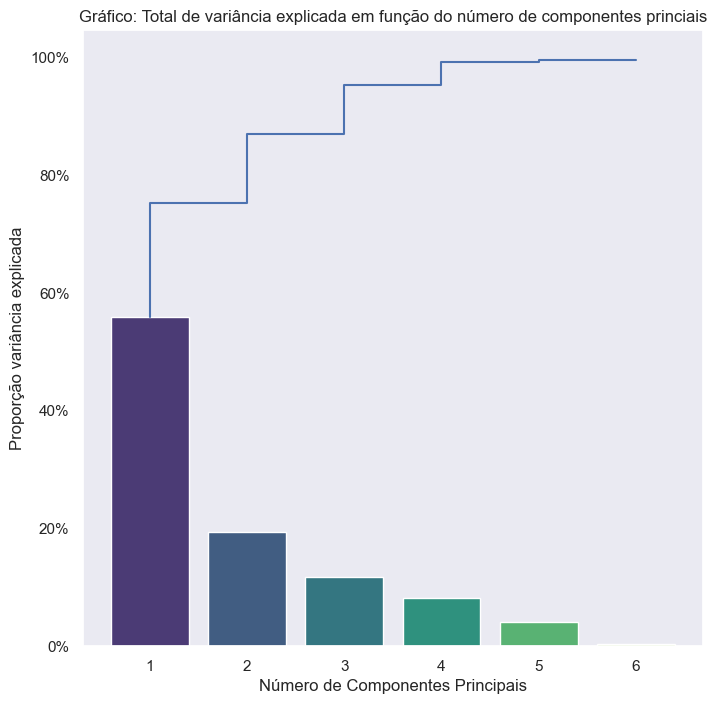

In [43]:
from matplotlib.ticker import PercentFormatter
#gráfico de barras 
sns.set_theme(style = 'dark')

f, ax = plt.subplots(figsize = (8,8))

sns.barplot(x = PC_numeros, y = prop_var, palette = 'viridis')
sns.lineplot(x = PC_numeros-1, y = cum_var, drawstyle ='steps-pre')

ax.set(xlabel = 'Número de Componentes Principais')
ax.set(ylabel = 'Proporção variância explicada')
ax.set(title = 'Gráfico: Total de variância explicada em função do número de componentes princiais')
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

PCA dos dados com apenas 2 componentes principais, para representar o K-means

In [75]:
pca = PCA(n_components=2)

reduzido_X = pd.DataFrame(data = pca.fit_transform(df_var), columns = ['PC1', 'PC2'])

reduzido_X.head(5)

,PC1,PC2
0,0.959915,2.000872
1,0.946799,1.863410
2,0.841454,1.949960
3,1.024500,1.762256
4,1.002557,1.742023


In [77]:
#centros 
centros = pca.transform(kmeans.cluster_centers_)

print(centros)

[[ 0.8052149  -0.08784491]
 [-2.35763875 -0.23823085]
 [ 4.45790076 -2.58982195]
 [ 1.90240102  3.77548401]
 [ 1.46824959  0.47637712]
 [ 2.06758614 -1.74172893]
 [ 2.72237211  0.90184183]]


AttributeError: Axes.set() got an unexpected keyword argument 'lengend'

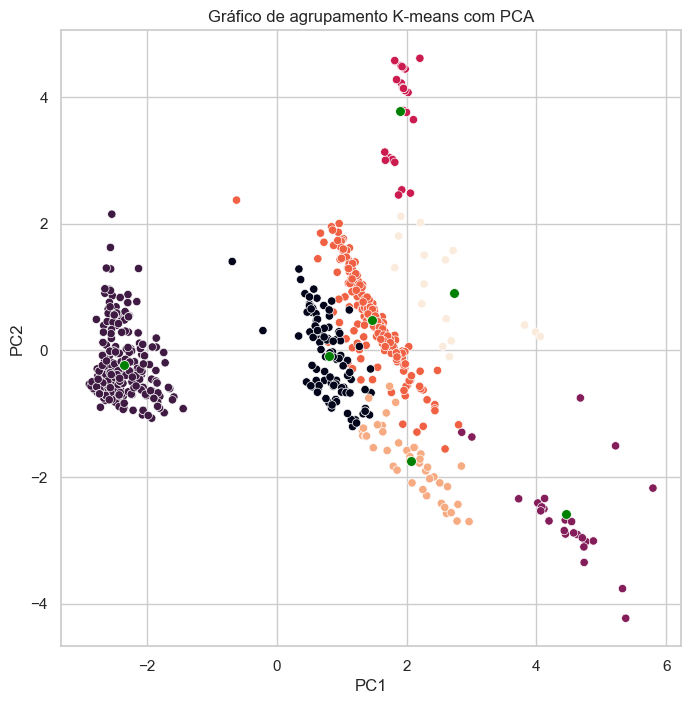

In [84]:
#gráfico
sns.set_theme(style='whitegrid')

f, ax = plt.subplots(figsize = (8,8))

sns.scatterplot(x= reduzido_X['PC1'], y = reduzido_X['PC2'], c = kmeans.labels_)
sns.scatterplot(x= centros[:,0], y = centros[:,1], markers = '*', s = 50, c = 'green')

ax.set(xlabel = 'PC1')
ax.set(ylabel = 'PC2')
ax.set(title = 'Gráfico de agrupamento K-means com PCA')


plt.show()

Random florest classificador

In [ ]:
#separando as variáveis em propriedades e nomes das colunas
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, -1].values

In [ ]:
#treinando o modelo de classificador para 100 árvores
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, Y)

In [85]:
#visualizando a arvore de decisão
dot_data = export_graphviz(rf.estimator_[0], out_file=None,
                           feature_names=['Su', 'Sy', 'E', 'G', 'mu', 'Ro'],
                           class_names = ['1', '2', '3', '4', '5'],
                           filled=True, rounded=True)

NameError: name 'rf' is not defined

In [ ]:
grafico = graphviz.Source(dot_data, format = 'png')